In [1]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sonar.all-data.csv')
df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
df.shape

(207, 61)

In [4]:
df.dtypes


0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

In [5]:
df.keys()

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [6]:
#df,colums or df.keys() both are same
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0.0200    207 non-null float64
0.0371    207 non-null float64
0.0428    207 non-null float64
0.0207    207 non-null float64
0.0954    207 non-null float64
0.0986    207 non-null float64
0.1539    207 non-null float64
0.1601    207 non-null float64
0.3109    207 non-null float64
0.2111    207 non-null float64
0.1609    207 non-null float64
0.1582    207 non-null float64
0.2238    207 non-null float64
0.0645    207 non-null float64
0.0660    207 non-null float64
0.2273    207 non-null float64
0.3100    207 non-null float64
0.2999    207 non-null float64
0.5078    207 non-null float64
0.4797    207 non-null float64
0.5783    207 non-null float64
0.5071    207 non-null float64
0.4328    207 non-null float64
0.5550    207 non-null float64
0.6711    207 non-null float64
0.6415    207 non-null float64
0.7104    207 non-null float64
0.8080    207 non-null float64
0.6791    207 non-null floa

In [8]:
#summary statistics

df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
df.R.unique()

array(['R', 'M'], dtype=object)

In [10]:
#let's find out the null values

df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

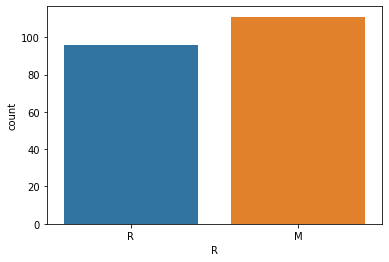

In [11]:
sns.countplot(x="R",data=df)
plt.show()


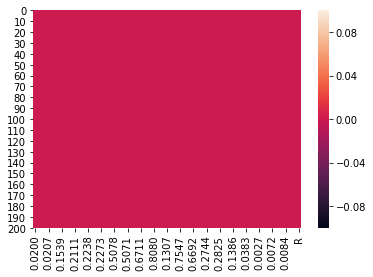

In [12]:
#Data Visualization
#to check the missing values.

sns.heatmap(df.isnull())
plt.show()


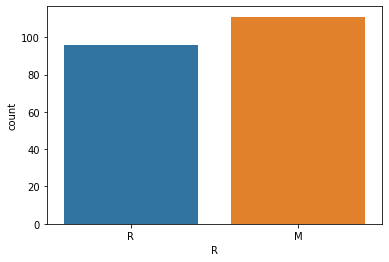

In [14]:
sns.countplot(x="R",data=df)
plt.show()


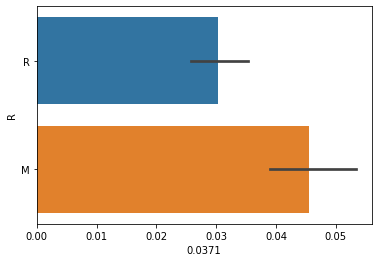

In [15]:
sns.barplot( data=df, x="0.0371",y="R")
plt.show()

In [16]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

0.0200       AxesSubplot(0.125,0.772143;0.065678x0.107857)
0.0371    AxesSubplot(0.203814,0.772143;0.065678x0.107857)
0.0428    AxesSubplot(0.282627,0.772143;0.065678x0.107857)
0.0207    AxesSubplot(0.361441,0.772143;0.065678x0.107857)
0.0954    AxesSubplot(0.440254,0.772143;0.065678x0.107857)
0.0986    AxesSubplot(0.519068,0.772143;0.065678x0.107857)
0.1539    AxesSubplot(0.597881,0.772143;0.065678x0.107857)
0.1601    AxesSubplot(0.676695,0.772143;0.065678x0.107857)
0.3109    AxesSubplot(0.755508,0.772143;0.065678x0.107857)
0.2111    AxesSubplot(0.834322,0.772143;0.065678x0.107857)
0.1609       AxesSubplot(0.125,0.642714;0.065678x0.107857)
0.1582    AxesSubplot(0.203814,0.642714;0.065678x0.107857)
0.2238    AxesSubplot(0.282627,0.642714;0.065678x0.107857)
0.0645    AxesSubplot(0.361441,0.642714;0.065678x0.107857)
0.0660    AxesSubplot(0.440254,0.642714;0.065678x0.107857)
0.2273    AxesSubplot(0.519068,0.642714;0.065678x0.107857)
0.3100    AxesSubplot(0.597881,0.642714;0.065678x0.10785

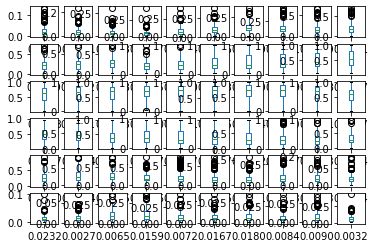

In [17]:
df.plot(kind='box',subplots=True, layout=(6,10))

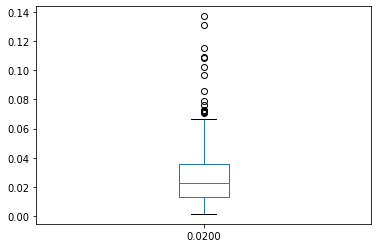

In [18]:
df["0.0200"].plot.box()

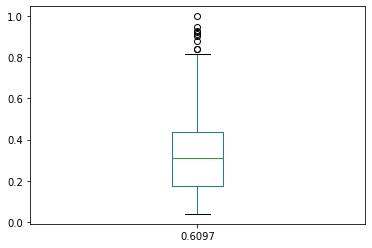

In [19]:
df["0.6097"].plot.box()

In [20]:
df.shape

(207, 61)

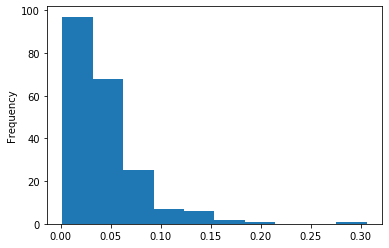

In [21]:
df['0.0428'].plot.hist()

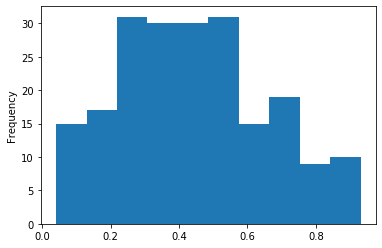

In [22]:
df['0.2604'].plot.hist()

In [23]:
#Lets check the skewness of the dataset
df.skew()

0.0200    2.122983
0.0371    2.149965
0.0428    2.645849
0.0207    3.397590
0.0954    2.020369
0.0986    1.243828
0.1539    0.977346
0.1601    1.482755
0.3109    1.654558
0.2111    1.278532
0.1609    0.980388
0.1582    0.580918
0.2238    0.730580
0.0645    1.028081
0.0660    0.761921
0.2273    0.687003
0.3100    0.648143
0.2999    0.518349
0.5078    0.282680
0.4797   -0.089670
0.5783   -0.253902
0.5071   -0.398178
0.4328   -0.605569
0.5550   -0.698045
0.6711   -0.787297
0.6415   -0.673803
0.7104   -0.625869
0.8080   -0.608543
0.6791   -0.438803
0.3857   -0.142382
0.1307    0.265875
0.2604    0.304906
0.5121    0.429747
0.7547    0.576483
0.8537    0.602241
0.8507    0.631304
0.6692    0.691936
0.6097    1.051649
0.4943    0.920842
0.2744    0.856537
0.0510    0.866684
0.2834    0.858517
0.2825    0.911296
0.4256    1.258602
0.2641    1.371554
0.1386    1.700582
0.1051    1.783552
0.1343    1.287541
0.0383    1.266425
0.0324    1.776935
0.0232    2.724246
0.0027    2.098458
0.0065    1.

In [24]:
df.corr()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0200,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
0.0371,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
0.0428,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
0.0207,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
0.0954,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
0.0986,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
0.1539,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
0.1601,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
0.3109,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
0.2111,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


In [ ]:
corr_hmap=df.corr()
plt.figure(figsize=(60,30))
sns.heatmap(corr_hmap,annot=True)
plt.show()

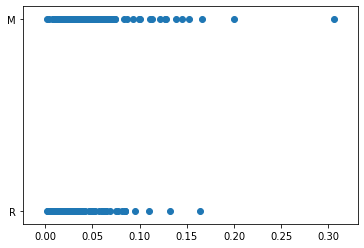

In [26]:
plt.scatter(df['0.0428'],df['R'])
plt.show()

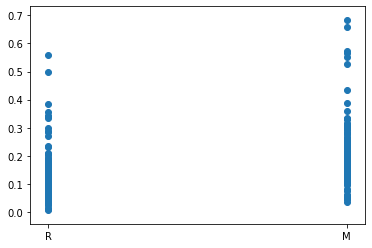

In [27]:
plt.scatter(df['R'],df['0.3109'])
plt.show()

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(con_data))
print(con_data.shape)


z

NameError: name 'con_data' is not defined

In [ ]:
df_newdata=df[(z<3).all(axis=1)]

In [ ]:
#Lets initialise the data frame with columns model and f1_score
df_models=pd.DataFrame(columns=["model","f1_score","std"])
models=list()
f1_scr=list()
std=list()


In [34]:
df.shape

(207, 61)

In [33]:
x=df.iloc[:,0:-1]
x.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [35]:
y=df.iloc[:,-1]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: R, dtype: object

In [36]:
x.shape

(207, 60)

In [37]:
y.shape

(207,)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=50)

In [39]:
from sklearn.model_selection import train_test_split
X = df.values[:,0:60]
Y = df.values[:,60]
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [40]:
x_train.shape

(138, 60)

In [41]:
y_train.shape

(138,)

In [42]:
x_test.shape

(69, 60)

In [43]:
y_test.shape

(69,)

In [46]:
#by using the logistic regression Algorithm
#Logistic Regression using Pipeline
pipe1 = Pipeline([('LR', LogisticRegression())])
pipe1.fit(X_train ,Y_train)
print(accuracy_score(Y_val, pipe1.predict(X_val)))

0.7619047619047619


In [48]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
lg.coef_

array([[-2.08730102e-01, -2.28012528e-01, -3.14306694e-01,
        -5.17534371e-01, -5.47233653e-01, -1.90687054e-01,
         1.35908858e-01,  8.39130922e-02, -9.09781619e-01,
        -8.99651702e-01, -1.15211331e+00, -9.32423013e-01,
        -6.16597292e-01,  2.96495205e-02,  2.49437629e-01,
         6.36543445e-01,  3.17787105e-01,  4.00749572e-01,
        -3.06721579e-01, -5.05108292e-01, -6.15146620e-01,
        -4.65570350e-01, -1.65458903e-01,  4.60103067e-02,
         1.97561559e-01,  4.77584891e-01,  2.45808570e-01,
        -2.54723112e-01, -1.16714165e-01, -4.00732647e-01,
         7.46247194e-01, -5.29180591e-02,  1.80363477e-01,
         3.14742315e-01,  4.12746253e-01,  1.26264347e+00,
         6.16614251e-01, -3.55646760e-01, -1.20447356e-01,
         7.29251675e-01,  2.68135369e-01, -5.24762959e-01,
        -6.69269872e-01, -7.43982168e-01, -1.10895091e+00,
        -8.53953476e-01, -7.01972538e-01, -6.95835486e-01,
        -3.33854039e-01, -4.83632693e-03, -1.12181555e-0

In [50]:
lg.intercept_

array([0.80609357])

In [51]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [52]:
lg.score(x_train,y_train)

0.8333333333333334

In [59]:
pipe2 = Pipeline([('scaled' , StandardScaler()),
                 ('LR' ,LogisticRegression())])
pipe2.fit(X_train ,Y_train)
print(accuracy_score(Y_val, pipe2.predict(X_val)))

0.7857142857142857


# Combining multiple models using Pipelines

In [61]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , StandardScaler()),('MNB' ,GaussianNB())]))))

from sklearn.model_selection import KFold

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    crossv_results = cross_val_score(model , X_train ,Y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    


['scaledLR']: 0.787132 (0.121251)
['scaledLR', 'scaledKNN']: 0.801103 (0.101039)
['scaledLR', 'scaledKNN', 'scaledDT']: 0.692279 (0.114916)
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC']: 0.847794 (0.100189)
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC', 'scaledMNB']: 0.691176 (0.164425)


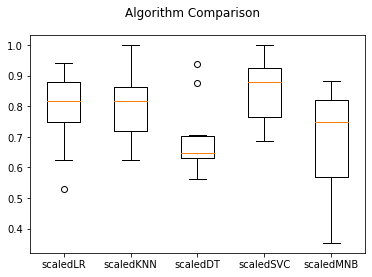

In [62]:
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

In [72]:
#Let it be save complete model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lg, 'sonar.all-data.pkl')

['sonar.all-data.pkl']